<a href="https://colab.research.google.com/github/palpitation0/Machine-Learning-homework/blob/master/7%EA%B0%95_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


In [0]:
df = pd.read_csv('data (2).csv')

In [93]:
df.head(5)

,X1,X2,X3,X4,X5
0,90,475,9.3,1010,1641
1,200,132,4.4,1094,1433
2,256,239,39.5,1578,1810
3,150,352,38.2,2604,2412
4,150,1240,3.6,1543,3233


In [0]:
df["company"]= ['롯데삼강','해태유업','대림수산','삼양식품','백 양',
           '동일방직','코오롱','태광산업','진도패션','한솔제지',
           '한양화학','동성화학','종근당','녹십자','쌍용양회',
           '대우전자','동아건설','동신주택']

In [95]:
df.head()

,X1,X2,X3,X4,X5,company
0,90,475,9.3,1010,1641,롯데삼강
1,200,132,4.4,1094,1433,해태유업
2,256,239,39.5,1578,1810,대림수산
3,150,352,38.2,2604,2412,삼양식품
4,150,1240,3.6,1543,3233,백 양


In [97]:
cols = df.columns.tolist()
cols

['X1', 'X2', 'X3', 'X4', 'X5', 'company']

In [98]:
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,company,X1,X2,X3,X4,X5
0,롯데삼강,90,475,9.3,1010,1641
1,해태유업,200,132,4.4,1094,1433
2,대림수산,256,239,39.5,1578,1810
3,삼양식품,150,352,38.2,2604,2412
4,백 양,150,1240,3.6,1543,3233


In [99]:
from scipy.spatial.distance import squareform, pdist
DistMat = pd.DataFrame(squareform(pdist(df.iloc[:,1:])),
                      columns=df.company.unique(), 
                      index=df.company.unique())
DistMat

,롯데삼강,해태유업,대림수산,삼양식품,백 양,동일방직,코오롱,태광산업,진도패션,한솔제지,한양화학,동성화학,종근당,녹십자,쌍용양회,대우전자,동아건설,동신주택
롯데삼강,0.000000,424.373668,659.809851,1776.187268,1845.917249,709.770357,10728.679574,6936.159496,1264.999372,9173.321593,23023.279302,690.789584,733.339921,1040.966263,19878.591506,33324.651052,26869.944861,2865.923055
해태유업,424.373668,0.000000,626.260337,1813.996538,2161.426760,621.586880,10744.925306,7146.443513,1069.029466,9164.532126,22986.618548,424.926770,528.279481,1050.508110,19865.326782,33347.019151,26888.175970,2792.089126
대림수산,659.809851,626.260337,0.000000,1199.619394,1743.754515,797.973408,10138.219039,6680.084748,1660.981520,8571.190008,22415.091429,808.380041,866.393675,714.664145,19268.922365,32737.151980,26276.945070,2259.320570
삼양식품,1776.187268,1813.996538,1199.619394,0.000000,1609.193326,1777.750008,9033.562420,5883.175779,2810.662598,7415.883684,21376.149916,1943.446413,1935.809983,1242.155888,18133.320616,31606.682184,25121.928072,1562.357594
백 양,1845.917249,2161.426760,1743.754515,1609.193326,0.000000,2278.128506,9549.109171,5964.383104,3093.761600,8260.072896,22018.328008,2358.019983,2416.151612,1935.630288,18822.550105,32037.569475,25639.034323,2644.687016
동일방직,709.770357,621.586880,797.973408,1777.750008,2278.128506,0.000000,10685.733971,6725.611945,1123.178637,8990.285226,22860.718441,525.016390,273.511901,706.447054,19718.290205,33285.429650,26793.896828,2718.959146
코오롱,10728.679574,10744.925306,10138.219039,9033.562420,9549.109171,10685.733971,0.000000,8034.807543,11696.892948,3150.432766,12663.645171,10765.574818,10808.691174,10014.293298,9493.435298,22620.842603,16258.779796,8106.062315
태광산업,6936.159496,7146.443513,6680.084748,5883.175779,5964.383104,6725.611945,8034.807543,0.000000,7749.130770,6275.419744,19148.728296,7090.407309,6956.700787,6166.550657,15741.841551,29169.045419,22633.301692,5797.890823
진도패션,1264.999372,1069.029466,1660.981520,2810.662598,3093.761600,1123.178637,11696.892948,7749.130770,0.000000,10040.247621,23816.472524,950.091132,921.310377,1793.065557,20745.288780,34306.293450,27833.697113,3638.052019
한솔제지,9173.321593,9164.532126,8571.190008,7415.883684,8260.072896,8990.285226,3150.432766,6275.419744,10040.247621,0.000000,14531.416724,9182.121394,9148.450960,8352.795386,10816.000577,24608.912813,17955.470768,6678.110853


In [0]:
from sklearn.manifold import MDS

In [0]:
mds = MDS(dissimilarity='precomputed', n_components=2, 
          random_state=40, max_iter=3000, eps=1e-9)
X = mds.fit_transform(DistMat)

In [0]:
from sklearn import metrics

In [101]:
D_Euc = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(D_Euc))

[[    0.   173.   583.  1787.  2360.   688. 10598.  7254.  1101.  9091.
  23090.   412.   599.   970. 19689. 33271. 26693.  2630.]
 [  173.     0.   638.  1831.  2282.   548. 10703.  7210.   984.  9163.
  23160.   242.   434.   947. 19784. 33377. 26801.  2733.]
 [  583.   638.     0.  1204.  1940.   726. 10079.  6733.  1610.  8526.
  22522.   726.   803.   489. 19153. 32754. 26181.  2114.]
 [ 1787.  1831.  1204.     0.  1534.  1689.  9006.  5725.  2767.  7354.
  21342.  1860.  1857.   992. 18037. 31669. 25109.  1208.]
 [ 2360.  2282.  1940.  1534.     0.  1798.  9848.  4986.  2853.  7890.
  21722.  2139.  1997.  1451. 18697. 32390. 25872.  2638.]
 [  688.   548.   726.  1689.  1798.     0. 10685.  6770.  1138.  9032.
  23007.   349.   205.   698. 19726. 33354. 26790.  2761.]
 [10598. 10703. 10079.  9006.  9848. 10685.     0.  8391. 11686.  2620.
  12995. 10801. 10837.  9994.  9129. 22674. 16105.  7970.]
 [ 7254.  7210.  6733.  5725.  4986.  6770.  8391.     0.  7837.  5792.
  18031.  7

In [0]:
theta = 80*np.pi/180
rot = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
Xr = np.dot(X,rot)

In [0]:
Xr[:,0] *= -1

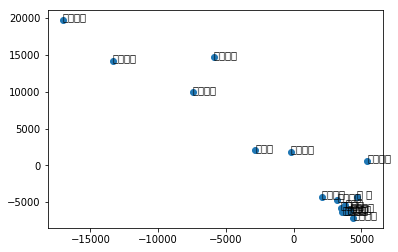

In [108]:
plt.scatter(Xr[:,0], Xr[:,1])
for i in range(len(df.company)):
  plt.text(Xr[i,0], Xr[i,1], df.company[i])

In [0]:
k_range = range(1, min(5, DistMat.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k, random_state=42,
              max_iter=300, eps=1e-9).fit(DistMat).stress_
         for k in k_range]

In [110]:
print(stress)

[416733071.2590424, 6183075.582357888, 1196710.368812469, 193848.76062004332]


Text(0, 0.5, 'stress')

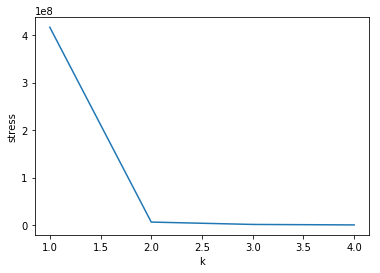

In [111]:
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

해석 : 5가지 재무제표에 따라 기업들을 군집화할 수 있음. 2차원으로 표현하는 것이 그 이상 차원을 쓰는 것보다 stress 측면에서 유리하다. 